In [1]:
import pandas as pd

df = pd.read_csv("cnn_data_4_5_-1076392975.csv")

In [2]:
df.head()

,url,title,body,date
0,https://www.cnn.com/2020/03/23/media/japan-abe...,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",3/24/2020
1,https://www.cnn.com/2020/03/16/perspectives/us...,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3/24/2020
2,https://www.cnn.com/2020/03/23/investing/globa...,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3/24/2020
3,https://www.cnn.com/2020/03/24/economy/china-e...,China is trying to revive its economy without ...,The country where the pandemic began was almos...,3/24/2020
4,https://www.cnn.com/2020/03/24/business/bailou...,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",3/24/2020


In [33]:
#Vectorization of the body and extractring top 500 words by frequency

#Extracting word and no of count into  a dictionary
import re
word_dict = {}
for i in df["body"]:
    for j in i.split(" "):
        j = j.lower()
        j = re.sub('[^A-Za-z0-9]+', '', j)
        if j in word_dict.keys() and j != "" :
            word_dict[j] = word_dict[j]+1
        else:
            word_dict[j] = 1

#Convert dict into a dataframe
result_df = pd.DataFrame([word_dict])
result_df = result_df.T
result_df.reset_index(inplace = True)
result_df.columns = ["Word", "Count"]


#Sorting values by result of count
result_df.sort_values(by=['Count'], ascending=False, inplace = True)

#Getting top 500 words by count value
new_features = result_df.head(500)

new_features.to_csv("new_features.csv")


In [35]:
#Table of frequency for first fifty words
new_features.head(50)

,Word,Count
1,the,11187
16,to,7326
7,and,5422
70,of,4850
26,a,4469
0,in,4020
43,that,2780
30,for,2566
133,is,2143
42,said,1921


Text(0, 0.5, 'Frequency')

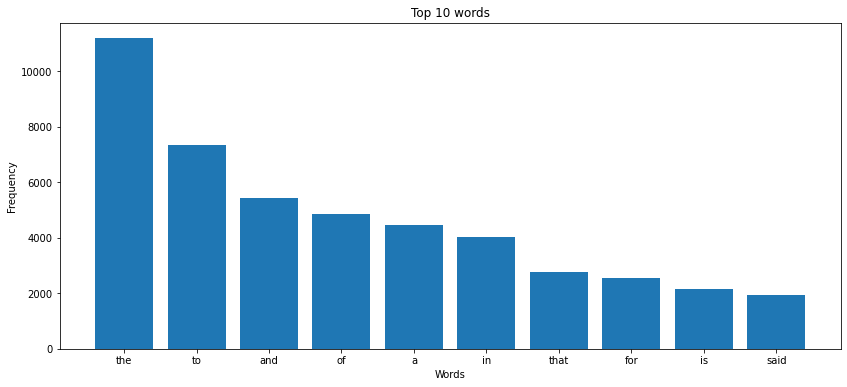

In [36]:
#Plotting bar chart of top ten words

import matplotlib.pyplot as plt
top_10 = new_features.head(10)


plt.figure(figsize = (14,6))

plt.bar(top_10["Word"], top_10["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [37]:
#Removing Outliers

features = new_features[new_features["Count"]<1000]

features.to_csv("Aoutliers.csv")

features

,Word,Count
130,but,961
207,from,961
254,they,890
67,by,889
219,their,857
...,...,...
1783,current,58
498,deal,58
521,stocks,58
1369,50,58


Text(0, 0.5, 'Frequency')

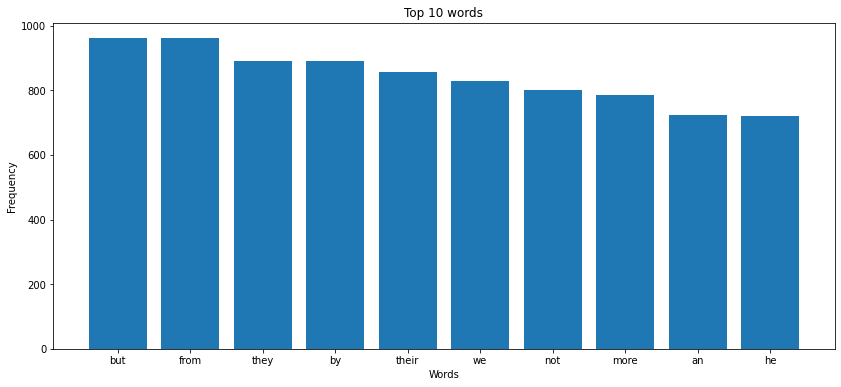

In [38]:
#Plotting bar chart of top ten words after outliers
top_10 = features.head(10)

plt.figure(figsize = (14,6))

plt.bar(top_10["Word"], top_10["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [39]:
#Obtaining frequency of tokens in Business Article and appearing in pandemic text
f = open("pandemic_092937.txt","r")
term = []
for x in f:
    for i in x.split():
        i = i.lower()
        i = re.sub('[^A-Za-z0-9]+', '', i)
        term.append(i)

In [40]:
test = features[features["Word"].isin(term) ]
test

,Word,Count
462,coronavirus,564
338,business,543
784,pandemic,289
1115,social,199
1029,covid19,113
1682,distancing,111
744,emergency,92
799,spread,92
1671,rate,91
672,national,83


Text(0, 0.5, 'Frequency')

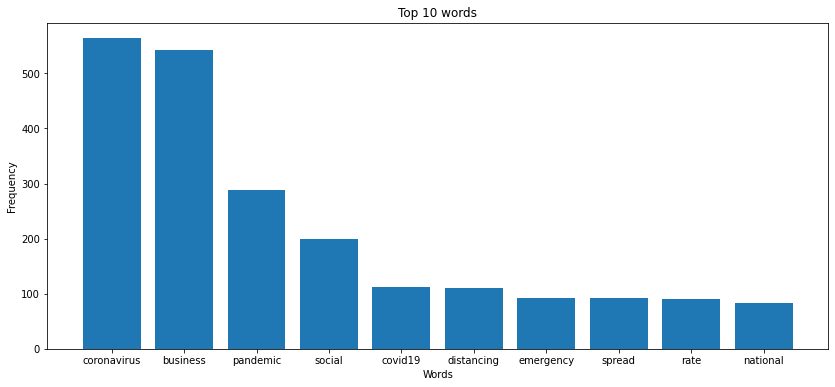

In [41]:

#plotting top ten result
top_ten = test.head(10)
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))

plt.bar(top_ten["Word"], top_ten["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")